In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.utils import class_weight
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [2]:
# Load the data
data = pd.read_csv('final_dataframe.csv')
data

,Unnamed: 0,participant,trial,onset_ms,difficulty,correctResponse,participantResponse,RT,errorLR,isComission,isOmission,time_ms,ECG,filtered_ecg,normalized_ecg,RR_intervals,Heart_Rate,HRV,RMSSD,SDNN
0,1,1,3,11342,0,0,0,0.395806,0,NaN,0.0,11342,-172.5,-15.836893,-0.058880,2.798,21.443888,7.828,7.828,2.515000
1,2,1,11,21968,0,1,1,0.687468,0,NaN,0.0,21968,154.0,-48.734000,-0.183536,10.626,5.646527,-2.750,2.750,4.320176
2,3,1,15,27046,0,2,1,0.534686,0,NaN,0.0,27046,179.5,-91.812792,-0.346774,5.078,11.815675,3.946,3.946,3.784834
3,4,1,16,28242,1,0,0,0.638847,0,NaN,0.0,28242,163.5,-103.752097,-0.445721,1.196,50.167224,-2.336,2.336,3.992489
4,5,1,17,29852,1,0,0,0.798577,0,NaN,0.0,29852,207.0,-103.752097,-0.392016,1.610,37.267081,5.426,5.426,3.874637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3979,3980,9,492,712734,1,0,0,0.541629,0,NaN,0.0,712734,-290.0,101.858347,0.387101,4.040,14.851485,446.740,446.740,990.523787
3980,3981,9,494,715244,1,0,0,0.458256,0,NaN,0.0,715244,-36.0,25.407515,0.097407,2.510,23.904382,-444.098,444.098,990.424418
3981,3982,9,496,717886,1,1,1,0.506915,0,NaN,0.0,717886,51.0,-15.012882,-0.055757,2.642,22.710068,445.196,445.196,990.325192
3982,3983,9,497,718984,0,0,0,0.374999,0,NaN,0.0,718984,-18.5,-15.012882,-0.096331,1.098,54.644809,-441.588,441.588,990.225622


In [3]:
# Define independent variables and target variable
features = ['filtered_ecg', 'normalized_ecg', 'RR_intervals', 'Heart_Rate', 'HRV', 'RMSSD', 'SDNN']
target = 'correctResponse'

In [4]:
# Prepare feature matrix X and target vector y
X = data[features]
y = data[target]

In [5]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Feature scaling - normalization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# Define the Neural Network model
nn_model = Sequential()
nn_model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
nn_model.add(Dropout(0.5))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dropout(0.5))
nn_model.add(Dense(1, activation='sigmoid'))
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
# Early stopping callback for NN
early_stopping_nn = EarlyStopping(patience=10, restore_best_weights=True)

In [9]:
# Train the Neural Network model
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
history_nn = nn_model.fit(X_train_scaled, y_train, epochs=100, batch_size=64, validation_split=0.2,
                          class_weight=dict(enumerate(class_weights)), callbacks=[early_stopping_nn])

Epoch 1/100
40/40 [==============================] - 2s 14ms/step - loss: 0.5866 - accuracy: 0.3213 - val_loss: 0.5491 - val_accuracy: 0.2429
Epoch 2/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2926 - accuracy: 0.2495 - val_loss: 0.5959 - val_accuracy: 0.2429
Epoch 3/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2002 - accuracy: 0.2483 - val_loss: 0.6984 - val_accuracy: 0.2429
Epoch 4/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0687 - accuracy: 0.2483 - val_loss: 0.8368 - val_accuracy: 0.2429
Epoch 5/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0825 - accuracy: 0.2487 - val_loss: 0.9614 - val_accuracy: 0.2429
Epoch 6/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0138 - accuracy: 0.2487 - val_loss: 1.0979 - val_accuracy: 0.2429
Epoch 7/100
40/40 [==============================] - 0s 8ms/step - loss: -0.0135 - accuracy: 0.2487 - val_loss: 1.1755 - val_accuracy: 0.2429
Epoch 8/100

In [10]:
# Define and train Random Forest model
rf_model = RandomForestClassifier(random_state=42, max_depth=10, n_estimators=300)
rf_model.fit(X_train_scaled, y_train)
rf_predictions = rf_model.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, rf_predictions)

In [11]:
# Define and train Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42, max_depth=10)
dt_model.fit(X_train_scaled, y_train)
dt_predictions = dt_model.predict(X_test_scaled)
dt_accuracy = accuracy_score(y_test, dt_predictions)

In [12]:
# Evaluate the Neural Network model
test_loss_nn, test_accuracy_nn = nn_model.evaluate(X_test_scaled, y_test)
print("Neural Network Test Accuracy:", test_accuracy_nn)

25/25 [==============================] - 0s 2ms/step - loss: 0.5900 - accuracy: 0.2635
Neural Network Test Accuracy: 0.2634880840778351


In [13]:
# Confusion matrix and classification report for Neural Network
y_pred_nn = (nn_model.predict(X_test_scaled) > 0.5).astype("int32")
confusion_nn = confusion_matrix(y_test, y_pred_nn)
classification_rep_nn = classification_report(y_test, y_pred_nn)
print("Neural Network Confusion Matrix:\n", confusion_nn)
print("Neural Network Classification Report:\n", classification_rep_nn)

25/25 [==============================] - 0s 1ms/step
Neural Network Confusion Matrix:
 [[  0 402   0]
 [  0 210   0]
 [  0 185   0]]
Neural Network Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       402
           1       0.26      1.00      0.42       210
           2       0.00      0.00      0.00       185

    accuracy                           0.26       797
   macro avg       0.09      0.33      0.14       797
weighted avg       0.07      0.26      0.11       797



C:\Users\Ammad\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ammad\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ammad\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
# Confusion matrix and classification report for Random Forest
confusion_rf = confusion_matrix(y_test, rf_predictions)
classification_rep_rf = classification_report(y_test, rf_predictions)
print("Random Forest Confusion Matrix:\n", confusion_rf)
print("Random Forest Classification Report:\n", classification_rep_rf)

Random Forest Confusion Matrix:
 [[395   2   5]
 [202   4   4]
 [180   3   2]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.98      0.67       402
           1       0.44      0.02      0.04       210
           2       0.18      0.01      0.02       185

    accuracy                           0.50       797
   macro avg       0.38      0.34      0.24       797
weighted avg       0.42      0.50      0.35       797



In [15]:
# Confusion matrix and classification report for Decision Tree
confusion_dt = confusion_matrix(y_test, dt_predictions)
classification_rep_dt = classification_report(y_test, dt_predictions)
print("Decision Tree Confusion Matrix:\n", confusion_dt)
print("Decision Tree Classification Report:\n", classification_rep_dt)

Decision Tree Confusion Matrix:
 [[371  15  16]
 [190  11   9]
 [174   6   5]]
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.92      0.65       402
           1       0.34      0.05      0.09       210
           2       0.17      0.03      0.05       185

    accuracy                           0.49       797
   macro avg       0.34      0.33      0.26       797
weighted avg       0.38      0.49      0.36       797



In [16]:
# Print accuracies of all models
print("Random Forest Accuracy:", rf_accuracy)
print("Decision Tree Accuracy:", dt_accuracy)
print("Neural Network Accuracy:", test_accuracy_nn)

Random Forest Accuracy: 0.5031367628607277
Decision Tree Accuracy: 0.48557089084065247
Neural Network Accuracy: 0.2634880840778351


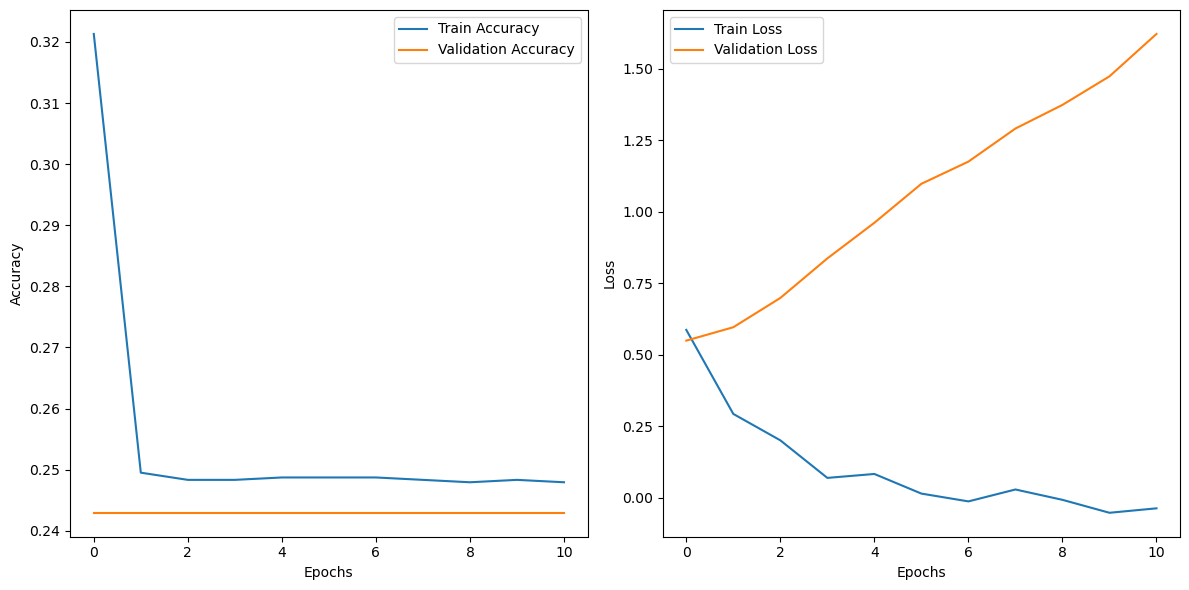

In [17]:
# Visualize training history for Neural Network
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_nn.history['accuracy'], label='Train Accuracy')
plt.plot(history_nn.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_nn.history['loss'], label='Train Loss')
plt.plot(history_nn.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

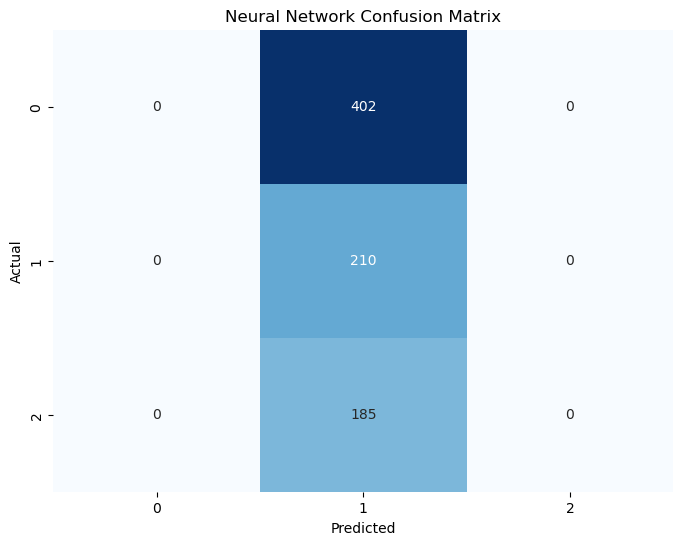

In [18]:
# Visualize Confusion Matrix for Neural Network
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_nn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Neural Network Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

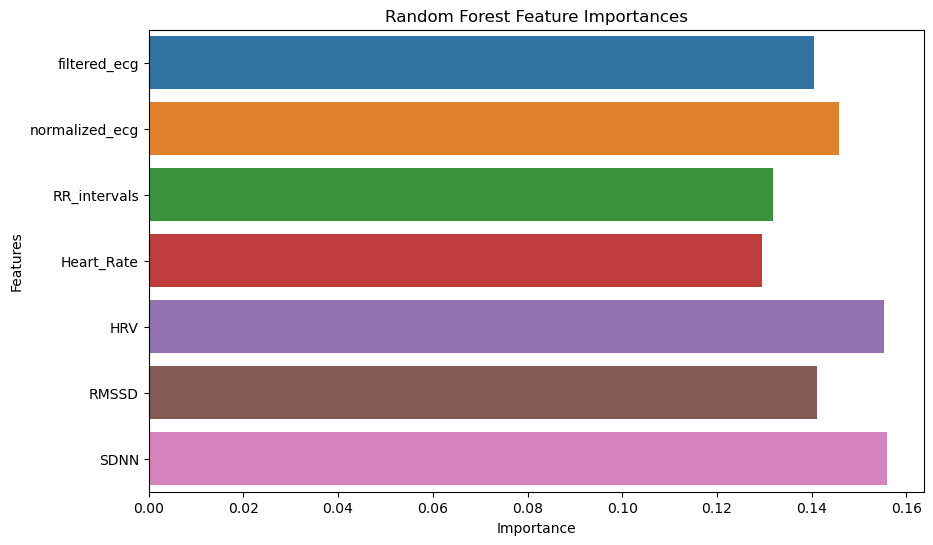

In [19]:
# Visualize Feature Importances for Random Forest
plt.figure(figsize=(10, 6))
feature_importances = rf_model.feature_importances_
sns.barplot(x=feature_importances, y=features)
plt.title('Random Forest Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

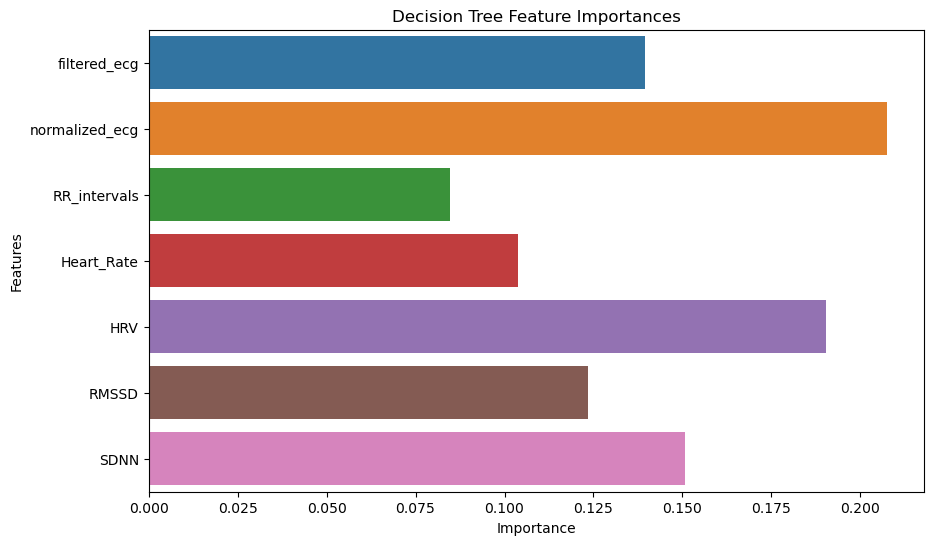

In [20]:
# Visualize Feature Importances for Decision Tree
plt.figure(figsize=(10, 6))
feature_importances_dt = dt_model.feature_importances_
sns.barplot(x=feature_importances_dt, y=features)
plt.title('Decision Tree Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()